# Happiness Dataset

In [1]:
#Importing Packages
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error, r2_score

### A. Summarize the Data

In [2]:
# Loading Dataset
happiness_df = pd.read_csv('.\data\happiness_data.csv')

happiness_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


#### Summary of Dataset : How much data is present?

In [40]:
#number of missing values
happiness_df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [3]:
# since there are some missing value,  we will drop those observations since no major number of rows or information will be lost
happiness_df = happiness_df.dropna()

#checking duplicated values 
happiness_df.duplicated().sum()

0

In [4]:
num_rows = happiness_df.shape[0]
num_cols = happiness_df.shape[1]

print(f"Total Number of observations: {num_rows}")
print(f"Total Number of features: {num_cols}")

Total Number of observations: 1949
Total Number of features: 11


#### Continuos and Categorical Features

In [22]:
#checking dtypes and unique values 
print("Data Types\n\n",happiness_df.dtypes, '\n')

print("Unique Values\n", happiness_df.nunique())

Data Types

 Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object 

Unique Values
 Country name                         166
year                                  16
Life Ladder                         1553
Log GDP per capita                  1500
Social support                       455
Healthy life expectancy at birth     828
Freedom to make life choices         535
Generosity                           609
Perceptions of corruption            572
Positive affect                      431
Negative affect                      374
dtype: int64


According to the data type of features, only country can be considered as a categorical feature since the other  categories are numerical and also have a lot of unique values which tends to be contnious feature. 

Year in this dataset is continous, since we need to measure 


### B. Statistical Representation of Data

#### Statistical Description and Visualization

Standard Deviation: The standard deviation is a measure of the amount of variation of the values of a variable about its mean.

Variance:It is the expected value of the squared deviation from the mean of a random variable

Range: Range of a dataset, max - min value

Inter quartile Range: Interquartile range tells you the spread of the middle half of your distribution. Quartiles segment any distribution that's ordered from low to high into four equal parts. The interquartile range (IQR) contains the second and third quartiles, or the middle half of your data set.

Skewness: Skewness is a measure of the asymmetry of a distribution. By plotting histogram we can know how skewed the distribution is.
A tail is a long, tapering end of a distribution. It indicates that there are observations at one of the extreme ends of the distribution, but that they’re relatively infrequent. A right-skewed distribution has a long tail on its right side.

Kurtosis: Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur.

In [4]:
# dropping year column for further analysis
df = happiness_df.drop(columns='year', axis=1)

df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.00000,1708.000000
mean,5.446680,9.321709,0.810321,63.225465,0.739442,-0.000638,0.750996,0.70955,0.269446
std,1.136592,1.158344,0.121638,7.687011,0.142846,0.162103,0.186028,0.10819,0.083083
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.32200,0.094000
25%,4.595000,8.394000,0.741000,58.175000,0.644000,-0.111250,0.697000,0.62300,0.208000
50%,5.364000,9.456500,0.835000,65.100000,0.757500,-0.025500,0.806000,0.72200,0.259000
75%,6.259000,10.272000,0.908000,68.685000,0.852000,0.089000,0.875000,0.80125,0.319250
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,0.94400,0.705000


In [7]:
df

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


Discussion of Statistical Data: 

1. 

In [12]:
# finding the numerical key attributes
key_attributes = df.select_dtypes(include=['float64', 'int64']).columns
key_attributes

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')

In [13]:
def statistical_meaurement(data, column_name): 
    print(f"\nShape Measures for {column_name}:")
    print(f"Skewness: {data[column_name].skew():.3f} and Kurtosis: {data[column_name].kurtosis() :.3f}")

for i in key_attributes:
    statistical_meaurement(df,i)


Shape Measures for Life Ladder:
Skewness: 0.100 and Kurtosis: -0.740

Shape Measures for Log GDP per capita:
Skewness: -0.298 and Kurtosis: -0.895

Shape Measures for Social support:
Skewness: -1.086 and Kurtosis: 1.041

Shape Measures for Healthy life expectancy at birth:
Skewness: -0.704 and Kurtosis: -0.164

Shape Measures for Freedom to make life choices:
Skewness: -0.605 and Kurtosis: -0.165

Shape Measures for Generosity:
Skewness: 0.795 and Kurtosis: 0.815

Shape Measures for Perceptions of corruption:
Skewness: -1.571 and Kurtosis: 2.116

Shape Measures for Positive affect:
Skewness: -0.359 and Kurtosis: -0.608

Shape Measures for Negative affect:
Skewness: 0.818 and Kurtosis: 1.083


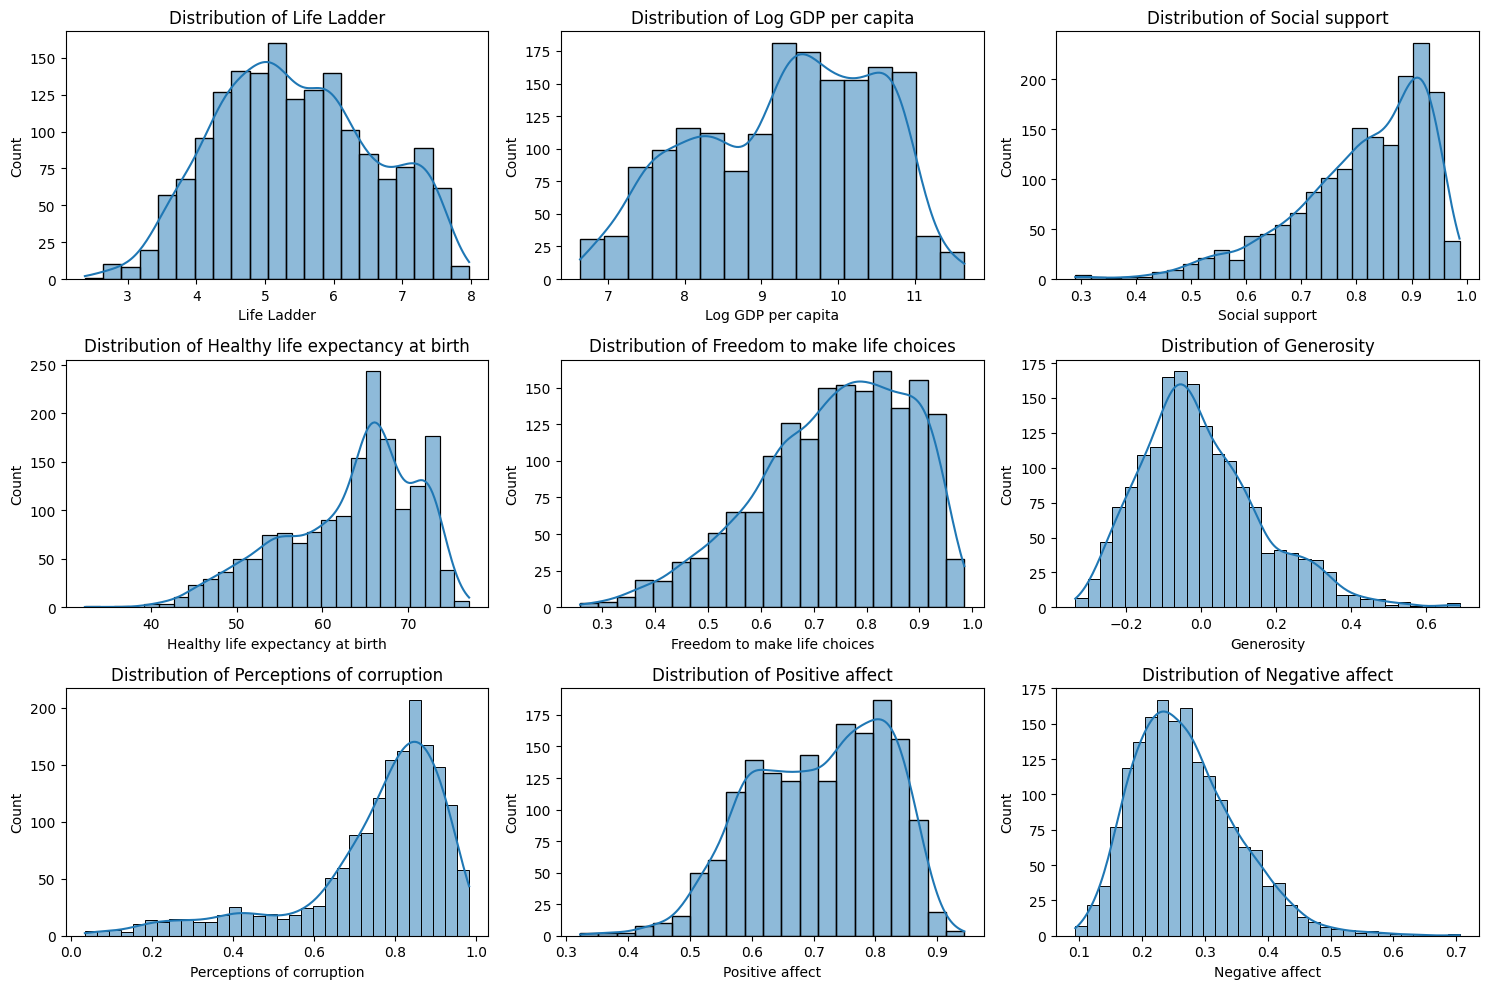

In [21]:
def plot_hist(df): 
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15,10))

    for idx, col in enumerate(numerical_cols, 1):
        plt.subplot(3, 3, idx)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_hist(df=df)

#### Special Treatment Needed



Analysis for Key Features on the basis of Histogram, Skewness and Kurtosis: 

1. Life Ladder: Skewness seems to be zero, data is symmetric. Less Outliers present with Kurtosis less than 0.
2. Log GDP per capita: Skewness seems to be zero, symmteric data. Less Outliers present with Kurtosis less than 0
3. Social Support: Left Skewed, data is asymmteric. Higher Outliers with Kurtosis more than 0
4. Healthy life expectancy at birth: Left Skewed, data is asymmteric. Less Outliers present with Kurtosis less than 0.
5. Freedom to make life choices: Skewness seems to be zero, data is symmetric.Less Outliers present with Kurtosis less than 0.
6. Generosity: Right Skewed, data is asymmteric. Higher Number of outliers with high Kurtosis.
7. Perceptions of corruption: Highly left skewed. Higher Number of outliers with high Kurtosis.
8. Positive affect:kewness seems to be zero, data is symmetric. Less Outliers due to lower Kurtosis.
9. Negative affect: Right Skewed, data is asymmteric. Higher Number of outliers with high Kurtosis.

There are some attributes which have many outliers, this can lead to biased prediction, thus we need to handle these situation.
According to the histogram the key attributes which can require outliers handling are: 
Social Support, Generosity, Perceptions of corruption and Negative affect.

Using winsorize method to handle the outliers.It reduces the impact of outliers by replacing extreme values with less extreme percentiles rather than completely removing them.

In [22]:
#keeping a copy of original dataset
original_df = df.copy()

#using iqr method to detect outlier
def detect_outliers(df, column): 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers present in {column}: ",len(outliers))
    return outliers, lower_bound, upper_bound

#using winsorize method to handle outlier
def handle_outlier(df, column): 
    outliers, lower_bound, upper_bound = detect_outliers(df, column)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)


key_attributes_outliers = ['Social support', 'Generosity', 'Perceptions of corruption','Negative affect' ]

for col in key_attributes_outliers: 
    handle_outlier(df=df, column=col)


Number of outliers present in Social support:  29
Number of outliers present in Generosity:  34
Number of outliers present in Perceptions of corruption:  153
Number of outliers present in Negative affect:  24


Visualizing the Treatment

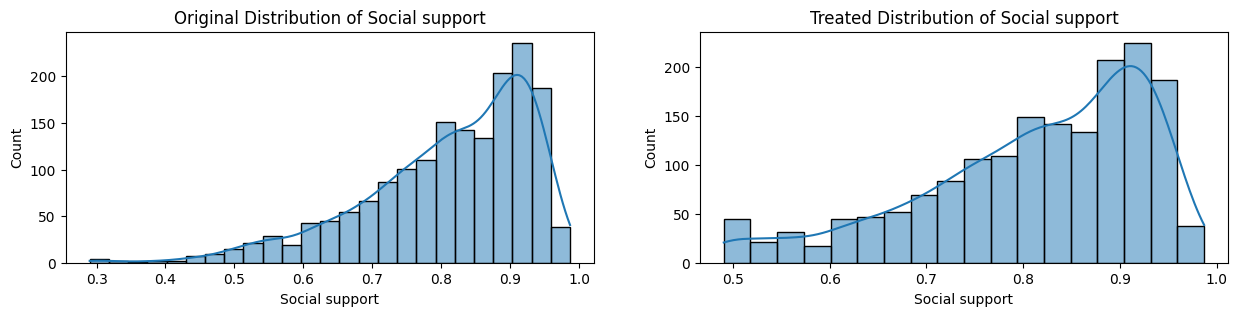

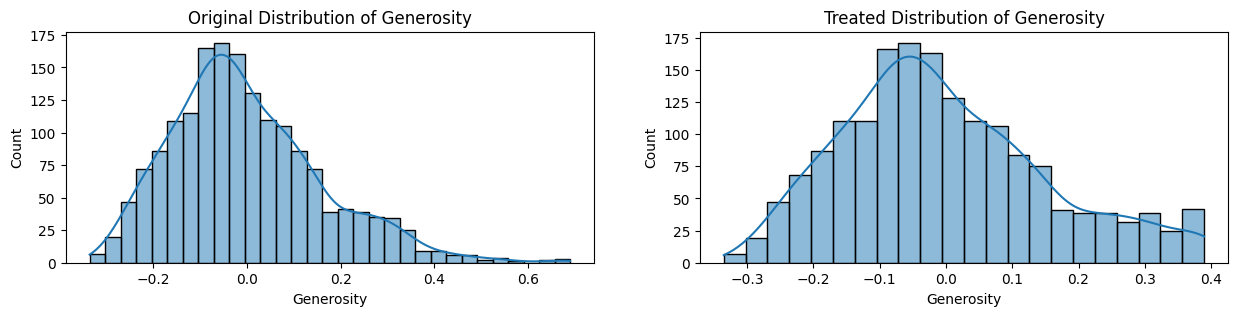

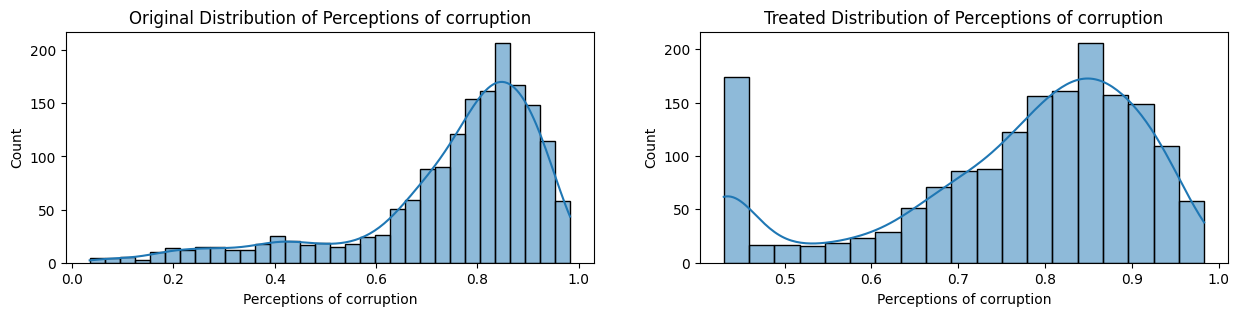

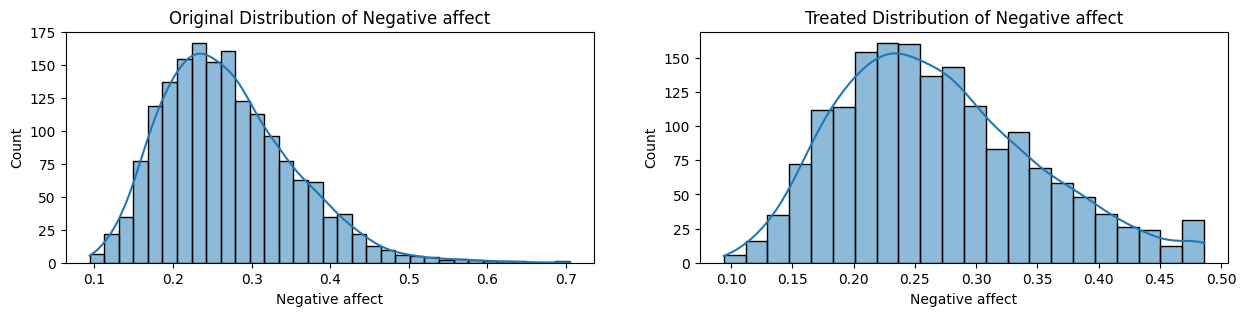

In [30]:
def compare_distributions(original_df, df_handled, column):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
        # Original distribution
        sns.histplot(data=original_df, x=column, kde=True, ax=ax1)
        ax1.set_title(f'Original Distribution of {column}')
        
        # Treated distribution
        sns.histplot(data=df_handled, x=column, kde=True, ax=ax2)
        ax2.set_title(f'Treated Distribution of {column}')
        
        plt.show()

for col in key_attributes_outliers:
    compare_distributions(original_df, df, col)

In [ ]:
# Drop rows in the outlier list

Analysis: 

We can clearly observe the changes of handling the outliers, which has made our data slight less skewed as well

### C. Relationship Between Attributes and Feature Selection

#### Pearson Correlation Coefficient

Correlation Coefficient r

r = 1: Perfect positive correlation

r = -1: Perfect negative correlation

r = 0: No linear correlation

|r| < 0.3: Weak correlation

0.3 ≤ |r| < 0.7: Moderate correlation

|r| ≥ 0.7: Strong correlation

In [16]:
# Encoding the country column 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country name'] = le.fit_transform(df['Country name'])

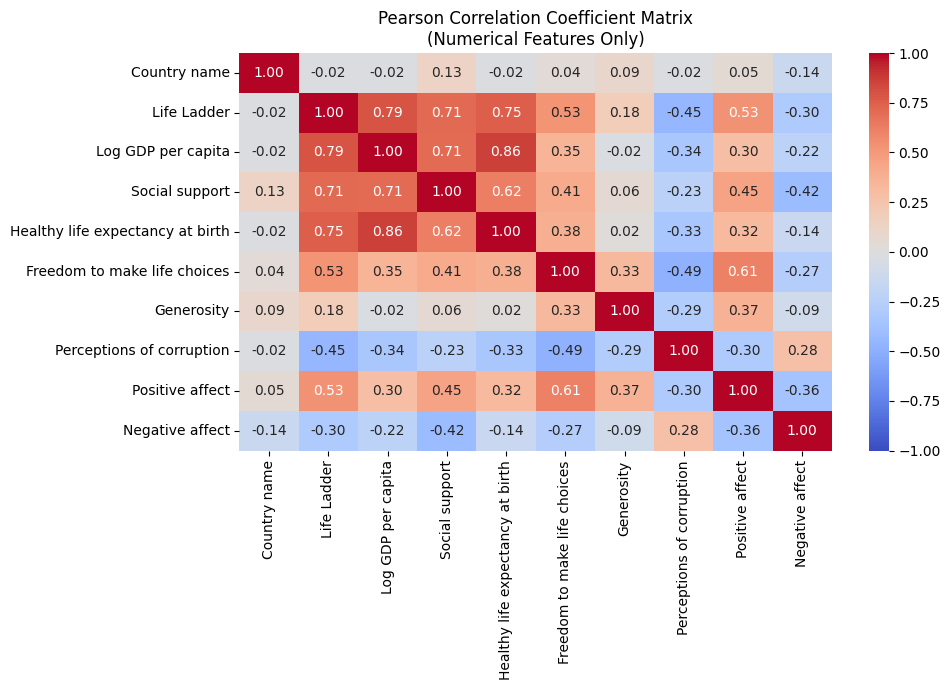

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap = 'coolwarm')
plt.title('Pearson Correlation Coefficient Matrix\n(Numerical Features Only)')
plt.tight_layout()
plt.show()

In [24]:
type(key_attributes)

pandas.core.indexes.base.Index

In [27]:
df.columns[1]

'Life Ladder'

In [30]:
# Finding Strong Correlation with threshold of 0.3 for Life Ladder

strong_corr = []

for j in range(len(df.columns)):
        print(df.columns[j])
        corr = corr_matrix.iloc[1,j]
        if abs(corr) >= 0.3:
            strong_corr.append({
                'var1': df.columns[1],
                'var2': df.columns[j],
                'correlation': corr,
            })
strong_corr.sort(key=lambda x: abs(x['correlation']), reverse=True)
strong_corr

Country name
Life Ladder
Log GDP per capita
Social support
Healthy life expectancy at birth
Freedom to make life choices
Generosity
Perceptions of corruption
Positive affect
Negative affect


[{'var1': 'Life Ladder', 'var2': 'Life Ladder', 'correlation': 1.0},
 {'var1': 'Life Ladder',
  'var2': 'Log GDP per capita',
  'correlation': 0.7928483956934615},
 {'var1': 'Life Ladder',
  'var2': 'Healthy life expectancy at birth',
  'correlation': 0.7546972189074647},
 {'var1': 'Life Ladder',
  'var2': 'Social support',
  'correlation': 0.7132110474688345},
 {'var1': 'Life Ladder',
  'var2': 'Positive affect',
  'correlation': 0.5330917330927294},
 {'var1': 'Life Ladder',
  'var2': 'Freedom to make life choices',
  'correlation': 0.5250891293521524},
 {'var1': 'Life Ladder',
  'var2': 'Perceptions of corruption',
  'correlation': -0.4481565703675663},
 {'var1': 'Life Ladder',
  'var2': 'Negative affect',
  'correlation': -0.3004662718371056}]

We can observe that Columns "Generosity" and "Country name" has very less correlation to Life Ladder, thus we can avoid using this column in our prediction

In [31]:
df_modified = df.drop(columns=['Generosity', 'Country name'], axis = 1)
df_modified.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.370,0.451,50.80,0.718,0.882,0.518,0.258
1,4.402,7.540,0.552,51.20,0.679,0.850,0.584,0.237
2,4.758,7.647,0.539,51.60,0.600,0.707,0.618,0.275
3,3.832,7.620,0.521,51.92,0.496,0.731,0.611,0.267
4,3.783,7.705,0.521,52.24,0.531,0.776,0.710,0.268


#### Scatter Plots 

Correlation between each feature

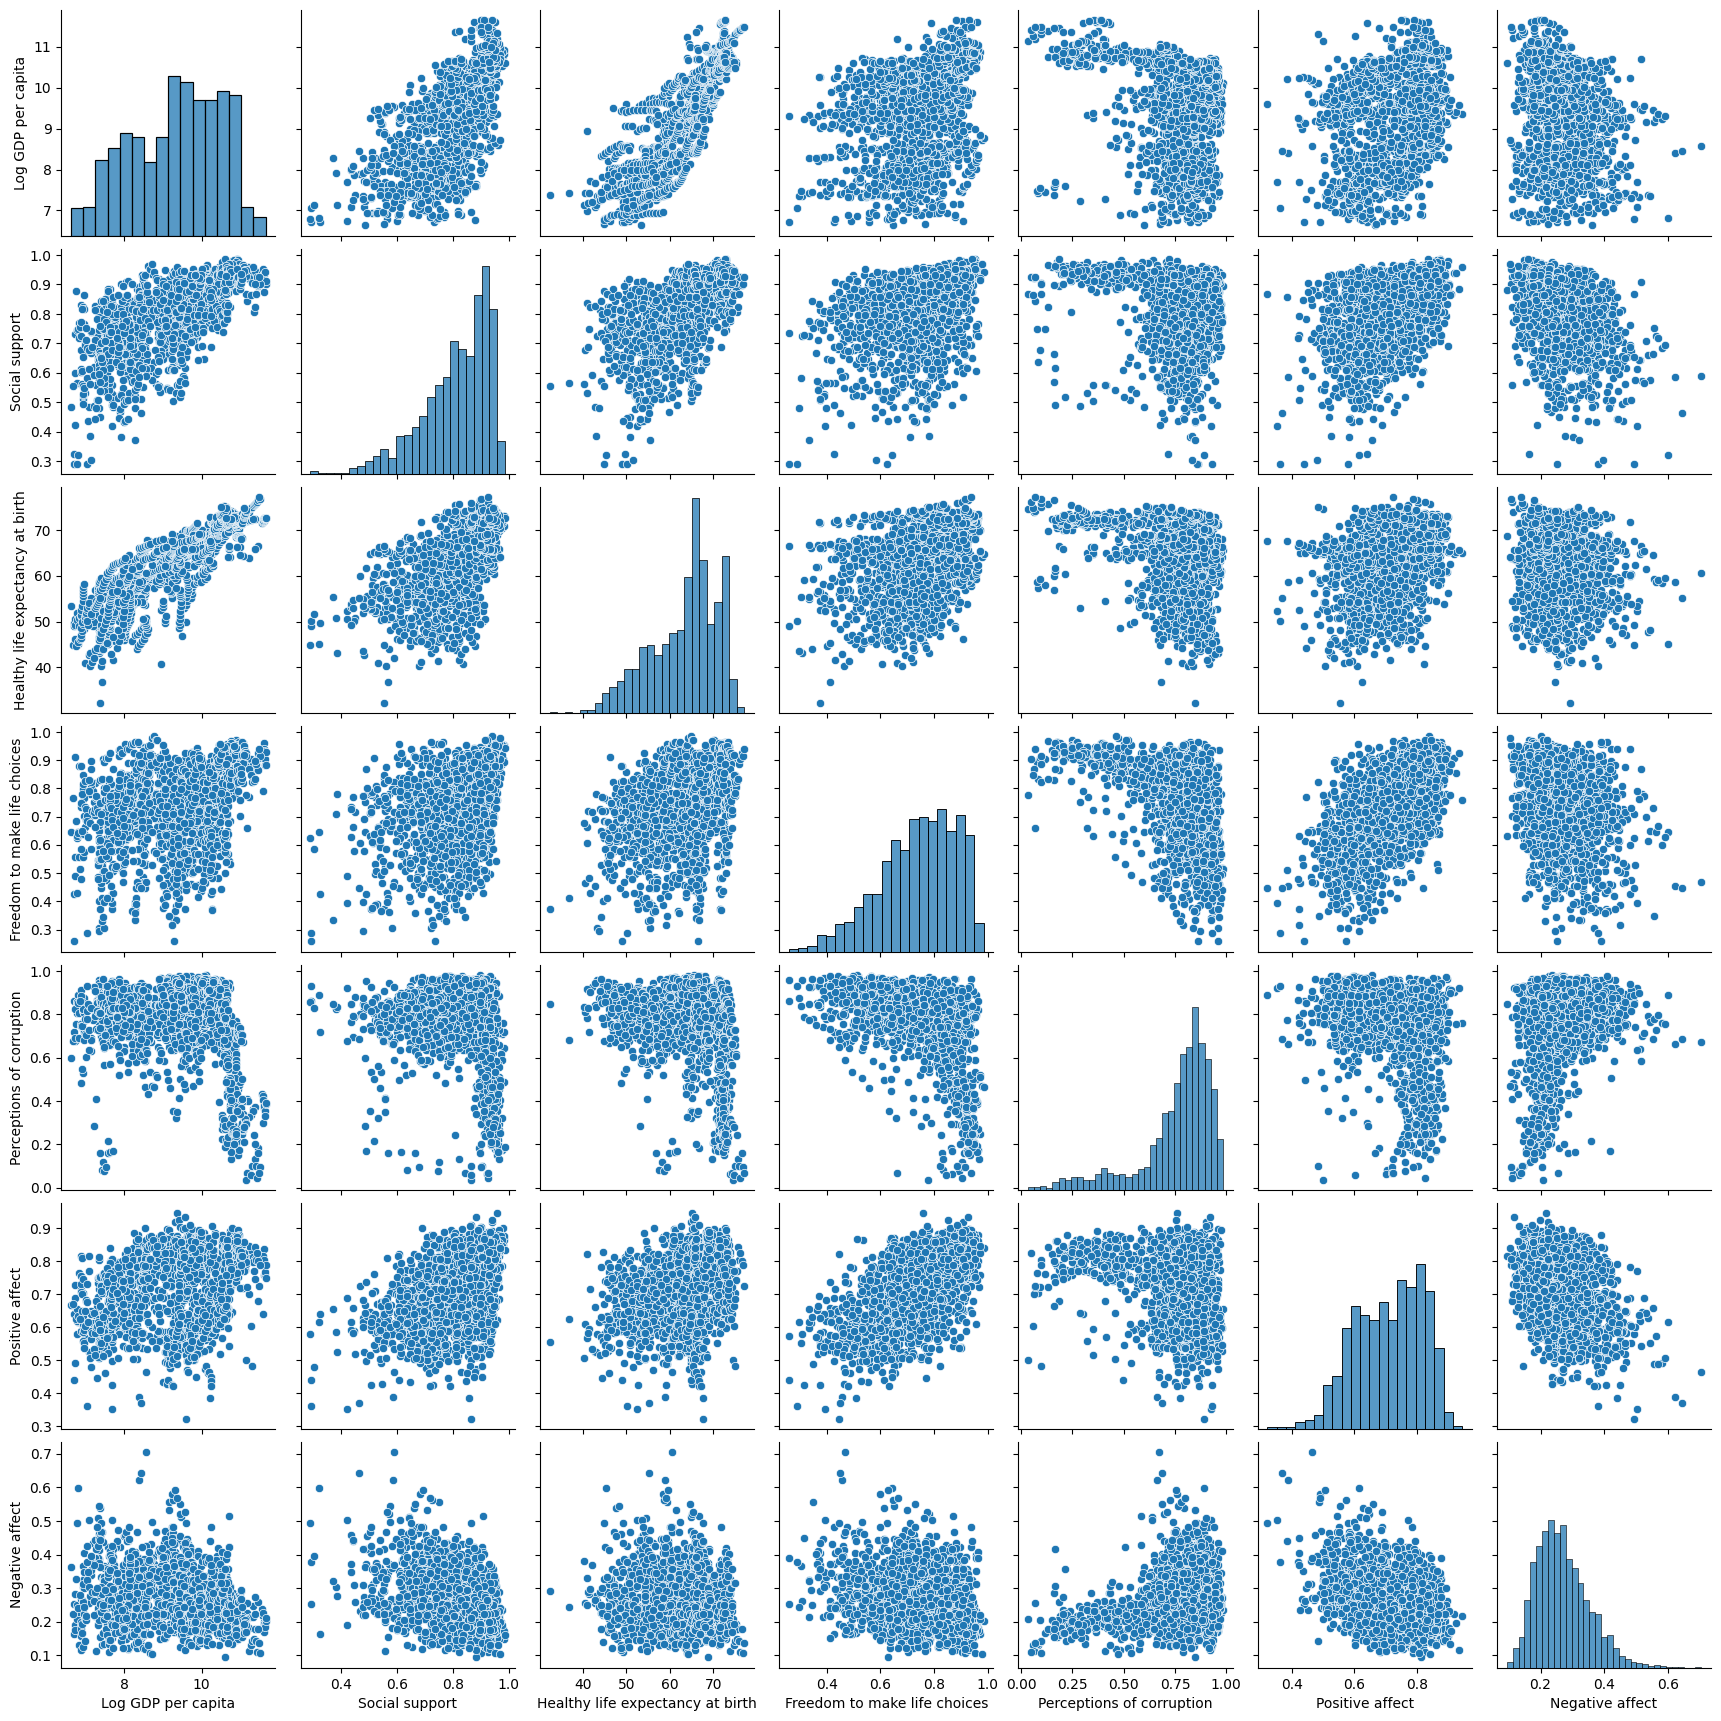

In [33]:
sns.pairplot(df_modified)
        
plt.show()

#### Discussions with Life Ladder

We can see from the correlation matrix that the data is highly correlated to each other. 
Even in scatter plots of distributions we can observe that the column Life Ladder (Information about how happy people are) which has to be predicted is highly correlated with all other numerical columns. 

### D. Splitting the Dataset 

Using train_test_split package from sklearn 

In [ ]:
#creating data and target

X = df_modified.drop(['Life Ladder'], axis = 1)
Y = df_modified.loc[:,'Life Ladder']

In [98]:
from sklearn.model_selection import train_test_split, KFold

X_train, X_test, y_train, y_test  = train_test_split(X, Y , test_size=0.25, shuffle=True, random_state=42)

print("Number of Observations in X_train", X_train.shape[0])
print("Number of Observations in X_test", X_test.shape[0])

Number of Observations in X_train 1281
Number of Observations in X_test 427


In [89]:
X_train

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
253,-1.606445,-0.884004,-1.526744,-0.540700,-0.369338,-1.184221,1.081731
835,-0.799703,-1.240892,-1.997662,-0.041288,0.064443,-0.086269,1.057475
1320,-0.907268,-2.043890,-0.867459,-1.033270,-0.235867,-1.221127,0.717897
1728,-2.061395,-4.241994,-1.825440,-3.085647,0.959813,-3.186368,1.324286
225,0.245095,0.778769,0.206233,0.321299,-0.291480,1.020910,0.075124
...,...,...,...,...,...,...,...
366,0.153400,0.616547,0.410746,0.362346,0.464857,1.214666,0.269169
1225,1.001582,1.070768,1.002757,1.326964,-2.977589,1.592952,-0.616160
1260,-2.105480,-0.957004,-1.720493,0.594949,-0.269235,-0.529140,-0.749565
1450,0.669186,0.786880,-0.033262,-0.164431,0.920884,-0.658311,-1.549999


#### Verification of Test Dataset

In [67]:
def compare_correlations(train_df,test_df, numerical_cols):
        train_corr = train_df[numerical_cols].corr()
        test_corr = test_df[numerical_cols].corr()
    
        corr_diff = test_corr - train_corr
        
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        
        sns.heatmap(train_corr, annot=True, cmap='RdBu', center=0, ax=axes[0])
        axes[0].set_title('Train Correlations')
        
        sns.heatmap(test_corr, annot=True, cmap='RdBu', center=0, ax=axes[1])
        axes[1].set_title('Test Correlations')
        
        sns.heatmap(corr_diff, annot=True, cmap='RdBu', center=0, ax=axes[2])
        axes[2].set_title('Correlation Differences\n(Test - Train)')
        
        plt.tight_layout()
        plt.show()

def compare_distribution(X_train, X_test): 
        plt.figure(figsize=(15, 5))
        for i, feature in enumerate(X_train.columns):
                fig, axes = plt.subplots(1, 2, figsize=(15, 4))
                sns.histplot(X_train[feature], color='blue', label='Train', kde=True, stat='density', bins=10, ax=axes[0])
                axes[0].set_title('Train Distribution')

                sns.histplot(X_test[feature], color='orange', label='Test', kde=True, stat='density', bins=10, ax = axes[1])
                axes[1].set_title('Test Distributions')

                plt.xlabel(feature)
                plt.ylabel('Density')
                plt.legend()

        plt.tight_layout()
        plt.show()

# def compare_statitics_summary(X_train, X_test):
#         train_summary = X_train.describe
#         test_summary = X_test.describe
#         return train_summary, test_summary

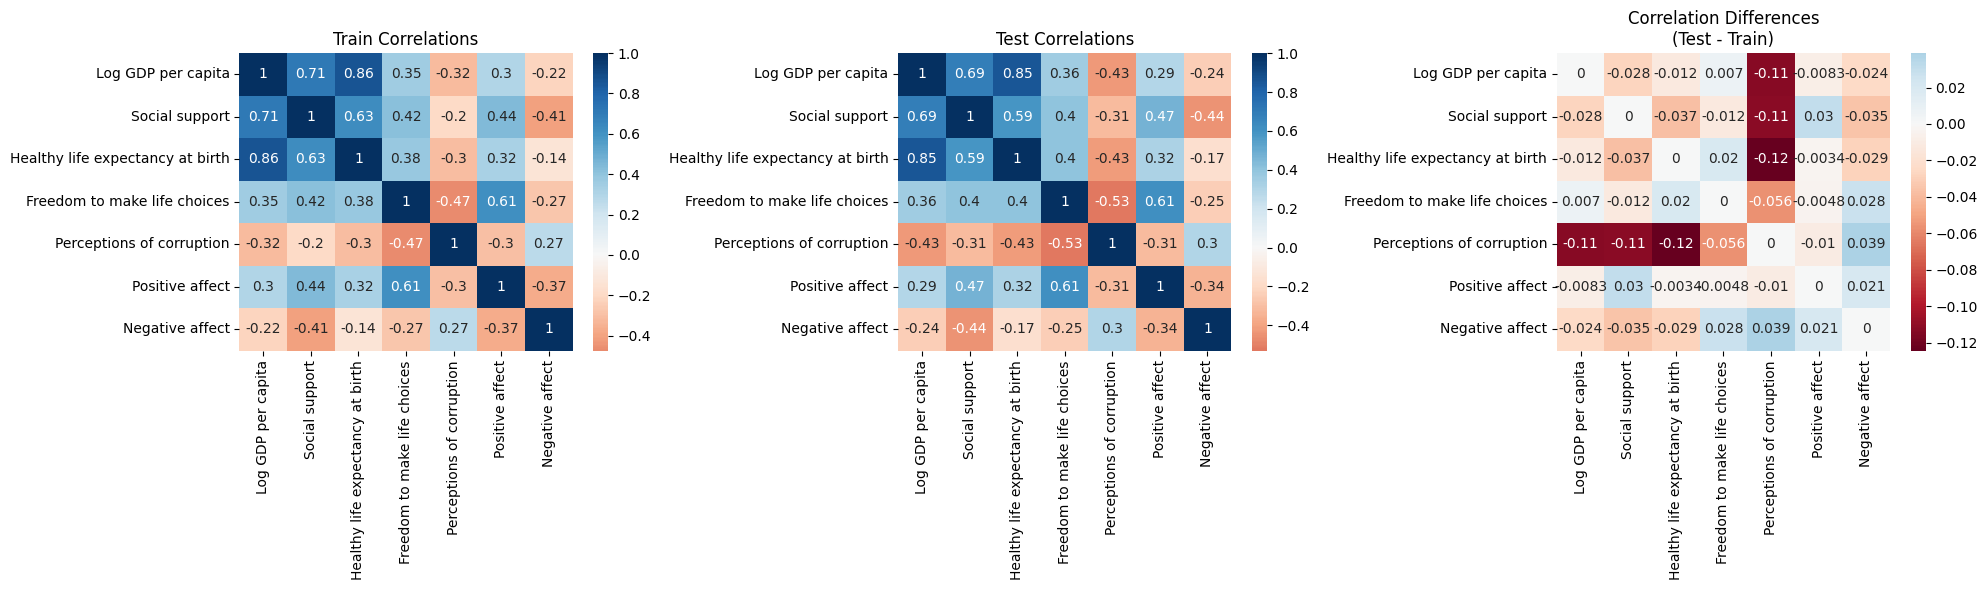

In [49]:
compare_correlations(X_train, X_test, X_train.columns)

If we cross verfiy the correlation in both the datasets with features,it is quite similar with the highest difference of 0.12. 
This can give us a confirmation that test dataset is similary correlated as the training dataset.

<Figure size 1500x500 with 0 Axes>

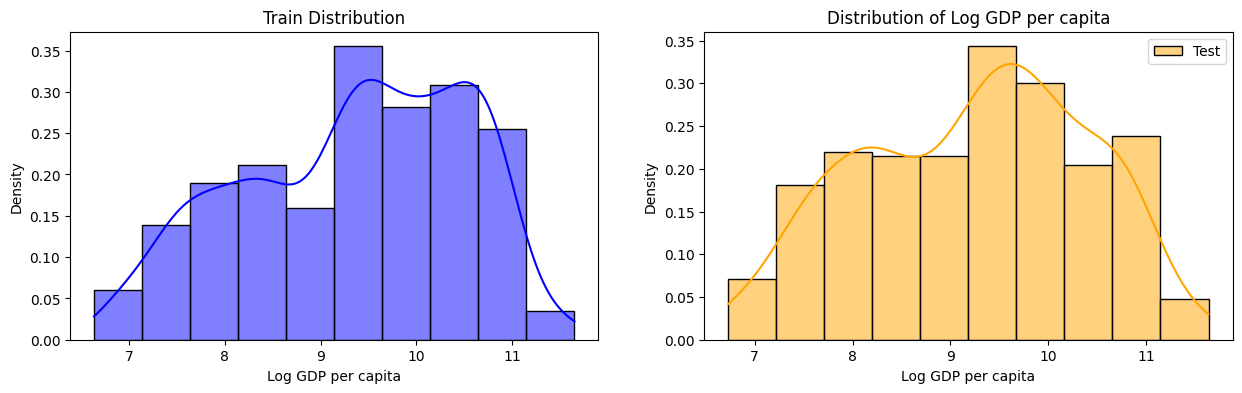

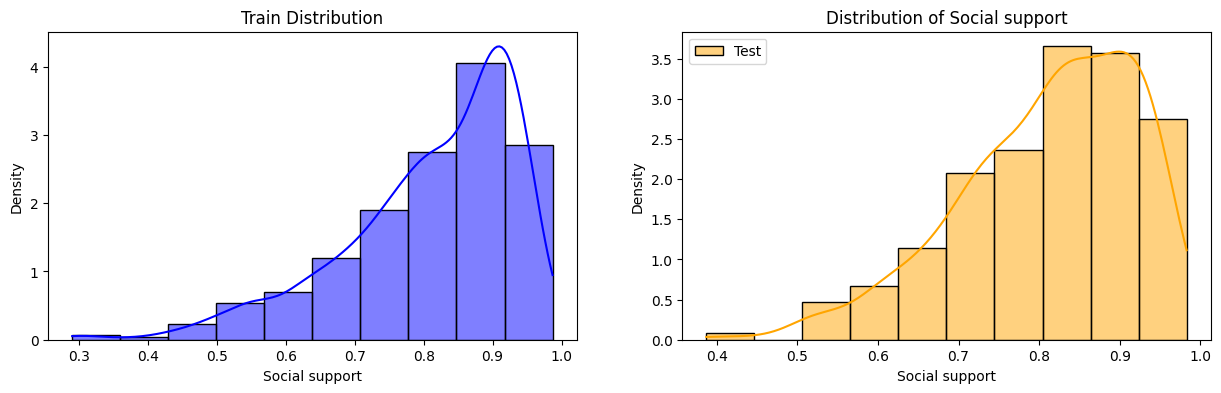

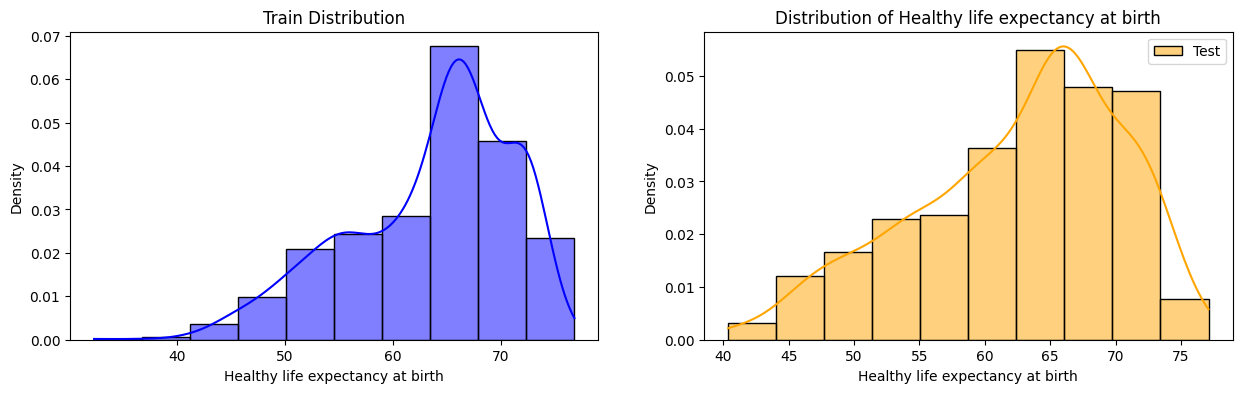

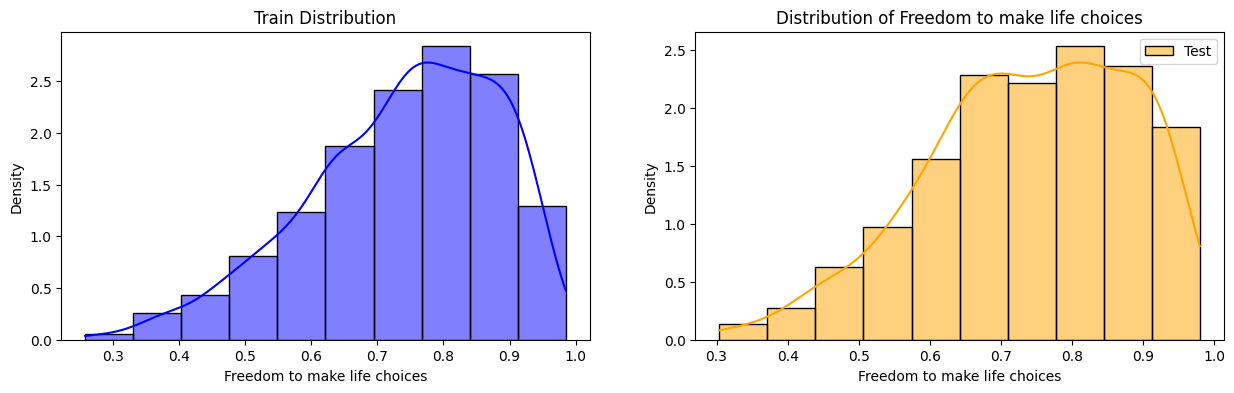

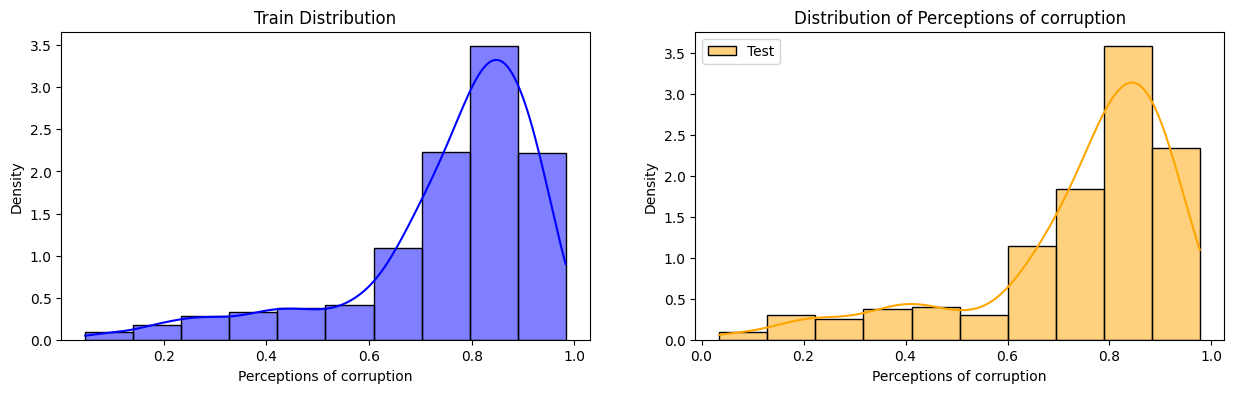

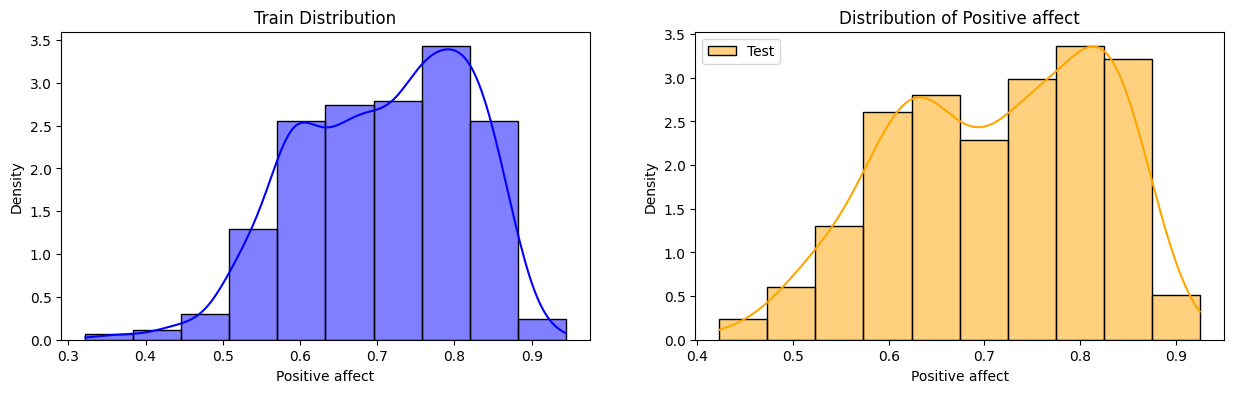

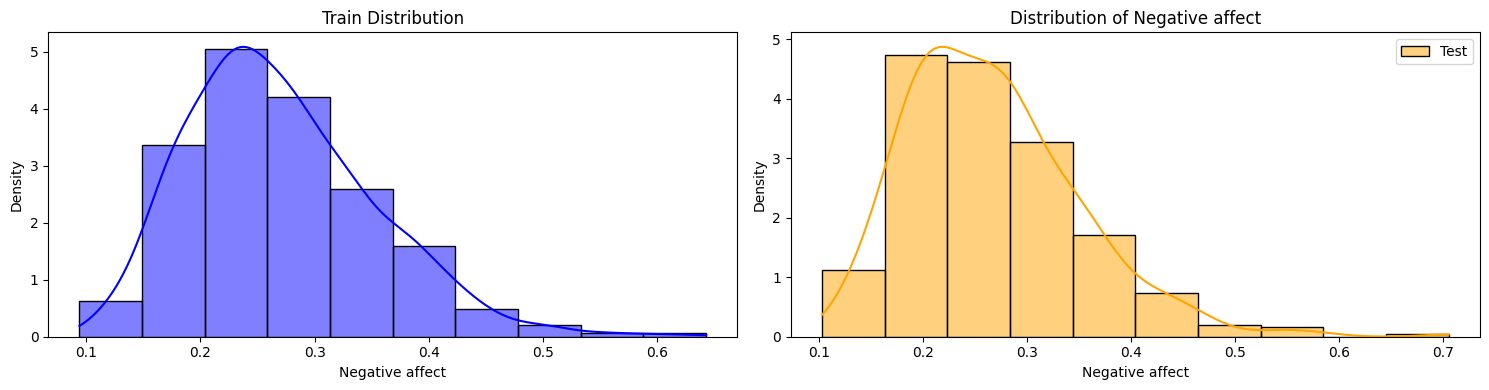

In [65]:
compare_distribution(X_train, X_test)

The distribution of features in both sets according to the visualization is almost similar, implying that the test set contains almost the same distribution as training set.1

#### Scaling Data

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


#### Saving Scaler 

Dumping the scaler in pickle so that any unseen new data can be transformed with the same scaler as the one fitted with training data.

In [70]:
def saving_pickle(file_name, file):
    with open(file_name, 'wb') as f:
         pickle.dump(file, f)

saving_pickle('scaler.pkl', scaler)

### E. Training Model - Linear Regression

#### Linear Model 

Linear Regression with SVD

In [71]:
class LinearRegressionSVD:
    def __init__(self):
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Add bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Compute using SVD (closed-form solution)
        U, s, Vt = np.linalg.svd(X_b, full_matrices=False)
        
        # Calculate pseudo-inverse using SVD components
        s_inv = np.diag(1/s)
        X_plus = Vt.T @ s_inv @ U.T
        
        # Compute weights (including bias as first term)
        self.coefficients = X_plus @ y
        self.bias = self.coefficients[0]
        self.weights = self.coefficients[1:]
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

3 Fold Cross Validation

In [135]:
def linear_svd_model(X_input,y_input):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    validation_loss = []
    training_loss = []

    for train_idx, val_idx in kf.split(X_input, y_input):

        X_train_svd, X_val_svd = X_input.iloc[train_idx], X_input.iloc[val_idx]
        y_train_svd, y_val_svd = y_input.iloc[train_idx], y_input.iloc[val_idx]

        svd_model = LinearRegressionSVD()
        svd_model.fit(X_train_svd, y_train_svd)

        svd_pred_train = svd_model.predict(X_train_svd)

        svd_pred_val = svd_model.predict(X_val_svd)
        
        #computing training and validation loss
        val_loss = np.sqrt(mean_squared_error(y_val_svd, svd_pred_val))
        validation_loss.append(val_loss)
        train_loss = np.sqrt(mean_squared_error(y_train_svd, svd_pred_train))
        training_loss.append(train_loss)
    return validation_loss, training_loss,svd_model
        

Validation and Training Loss

RMSE Training Loss [0.5232004287554443, 0.5693649670887142, 0.5434455710626056]
RMSE Validation Loss [0.5927670200493289, 0.4997206293579122, 0.5571652349777038]


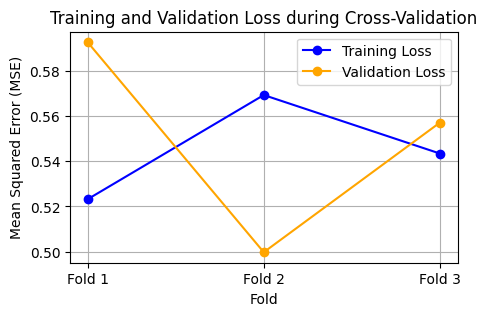

In [136]:

validation_loss, training_loss, svd_model = linear_svd_model(X_train_scaled, y_train)

print("RMSE Training Loss", training_loss)
print("RMSE Validation Loss", validation_loss)

# Plotting Training and Validation Losses
plt.figure(figsize=(5, 3))
plt.plot(training_loss, label='Training Loss', marker='o', color='blue')
plt.plot(validation_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Training and Validation Loss during Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(ticks=range(len(training_loss)), labels=[f'Fold {i+1}' for i in range(len(validation_loss))])

plt.grid(True)
plt.legend()
plt.show()

Visualization

Analysis: 


Linear Regression with SGD: SGD Regressor

In [133]:
from sklearn.linear_model import SGDRegressor

def sgd_regressor_model(X_input, Y_input, penalty = 'l2'):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    validation_loss = []
    training_loss = []

    max_iter = 1000

    for train_idx, val_idx in kf.split(X_input, Y_input):

        x_train, x_val = X_input.iloc[train_idx], X_input.iloc[val_idx]
        Y_train, Y_val = Y_input.iloc[train_idx], Y_input.iloc[val_idx]

        sgd_model = SGDRegressor(
                        penalty=penalty
                        max_iter=max_iter,
                        tol=1e-3,
                        eta0=0.01,
                        learning_rate='constant',
                        random_state=42)
        
        sgd_model.fit(x_train, Y_train)

        sgd_pred_train = sgd_model.predict(x_train)

        sgd_pred_val = sgd_model.predict(x_val)
        
        #computing training and validation loss
        val_loss = np.sqrt(mean_squared_error(Y_val, sgd_pred_val))
        validation_loss.append(val_loss)
        train_loss = np.sqrt(mean_squared_error(Y_train, sgd_pred_train))
        training_loss.append(train_loss)
    return validation_loss, training_loss, sgd_model

RMSE Training Loss - SGD [0.5342026288713345, 0.5730389514649633, 0.548634843533648]
RMSE Validation Loss - SGD [0.6126618561339512, 0.5064931651830209, 0.5613011546491028]


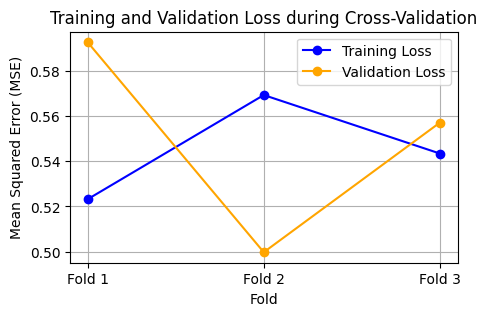

In [134]:
validation_loss_sgd, training_loss_sgd,sgd_model = sgd_regressor_model(X_train_scaled, y_train)

print("RMSE Training Loss - SGD", training_loss_sgd)
print("RMSE Validation Loss - SGD", validation_loss_sgd)

# Plotting Training and Validation Losses
plt.figure(figsize=(5, 3))
plt.plot(training_loss, label='Training Loss', marker='o', color='blue')
plt.plot(validation_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Training and Validation Loss during Cross-Validation')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(ticks=range(len(training_loss)), labels=[f'Fold {i+1}' for i in range(len(validation_loss))])

plt.grid(True)
plt.legend()
plt.show()

#### Regularization: Preventing Overfitting

In [ ]:
# Penalty in SGD Regressor Model
# ------------------- SGD Regressor with Ridge (L2 Regularization) -------------------
sgd_ridge = SGDRegressor(penalty='l2', alpha=0.1, random_state=42)
sgd_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = sgd_ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)


In [ ]:
# ------------------- SGD Regressor with Lasso (L1 Regularization) -------------------
sgd_lasso = SGDRegressor(penalty='l1', alpha=0.1, random_state=42)
sgd_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = sgd_lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

In [ ]:
# ------------------- SGD Regressor with Elastic Net (Combination of L1 and L2) -------------------
sgd_enet = SGDRegressor(penalty='elasticnet', alpha=0.1, l1_ratio=0.5, random_state=42)
sgd_enet.fit(X_train_scaled, y_train)
y_pred_enet = sgd_enet.predict(X_test_scaled)
enet_mse = mean_squared_error(y_test, y_pred_enet)

#### Impact of Regularization 

In [ ]:
# ------------------- Display Results -------------------
print("SGD with Ridge (L2) MSE: ", ridge_mse)
print("SGD with Lasso (L1) MSE: ", lasso_mse)
print("SGD with Elastic Net MSE: ", enet_mse)

#### Hyperparameter Tuning in SGD

In [ ]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],      # Types of regularization
    'alpha': [0.0001, 0.001, 0.01, 0.1],       # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],                # Initial learning rate
    'max_iter': [1000, 1500, 2000],             # Maximum iterations
    'tol': [1e-3, 1e-4, 1e-5]                  # Tolerance for stopping criteria
}

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(n_epochs), train_losses, label='Training Loss', color='blue')
plt.plot(range(n_epochs), val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss as a Function of Training Iterations')
plt.xlabel('Training Iteration (Epoch)')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.grid()
plt.show()

#### Findings

#### Saving Models and Scaler

### F. Training Model - Polynomial Regression

#### Polynomial Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Sample Data Generation
# Let's create some synthetic data for this example.
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # 80 random points between 0 and 5
y = 2 * X**2 - 1 + np.random.randn(80, 1)  # Quadratic relationship with noise

# Visualize the data
plt.scatter(X, y, color='blue', label='Data points')
plt.title("Sample Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Transforming data into polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree for higher order
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SGD Regressor
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train_scaled, y_train.ravel())  # .ravel() converts y to 1D array

# Predictions
y_train_pred = sgd_regressor.predict(X_train_scaled)
y_test_pred = sgd_regressor.predict(X_test_scaled)

# Evaluating the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.scatter(X_train, y_train_pred, color='red', label='Training predictions', alpha=0.5)
plt.scatter(X_test, y_test_pred, color='green', label='Test predictions', alpha=0.5)
plt.title("Polynomial Regression with SGD")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


#### Regularization

#### Hyperparameter Tuning 

#### Description of Models

### Saving Models

### G. Predictions and Results

#### Prediction

#### Evaluation Metric

#### Summary

#### Future Work